In [215]:
from sklearn.datasets import load_diabetes
df = load_diabetes()
x = df.data
Y = df.target

In [216]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,Y,test_size=0.3)

In [217]:
from sklearn.linear_model import Ridge,LinearRegression
rg = Ridge(alpha=0.0001)
lr = LinearRegression()

lr.fit(xtrain,ytrain)
rg.fit(xtrain,ytrain)
ypred1 = rg.predict(xtest)
ypred2 = lr.predict(xtest)

### Currently accuracy almost same but for general Ridge is better

In [218]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred1),r2_score(ytest,ypred2))

0.5654329170746012 0.5654694929704613


# OWN RIDGE

In [219]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

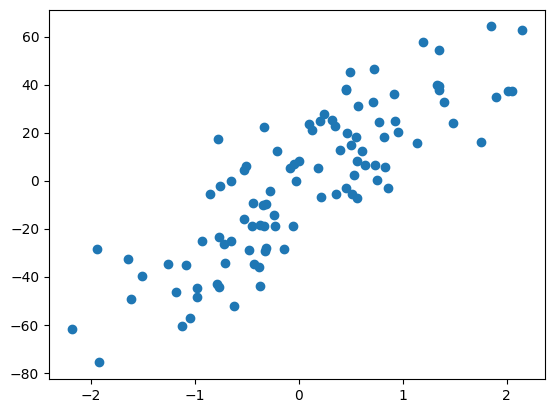

In [220]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X,y)

In [221]:
class Ridge_Reg:
    def __init__(self,lamda = 1):
        self.lam = lamda
        self.m = 0
        self.b = 0

    def fit(self,xtrain,ytrain):
        self.m = np.dot((xtrain - np.mean(xtrain)).T,ytrain - np.mean(ytrain)) / (sum(pow(xtrain - np.mean(xtrain),2)) + self.lam)
        self.b = np.mean(ytrain) - self.m * np.mean(xtrain)

    def predict(self,xtest):
        return self.m * xtest + self.b

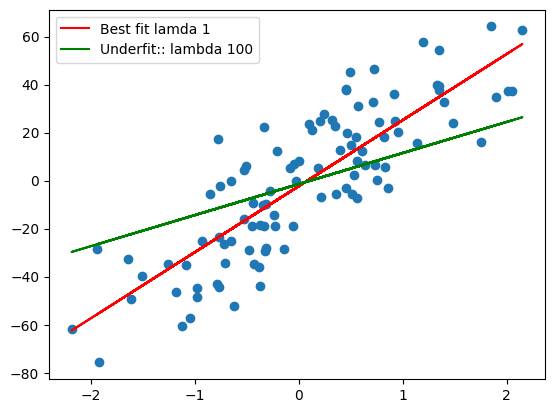

In [222]:
lr = Ridge_Reg()
lr1 = Ridge_Reg(lamda=100)
lr.fit(X,y)
lr1.fit(X,y)

plt.scatter(X,y)
plt.plot(X,lr.predict(X),c='r',label = "Best fit lamda 1")
plt.plot(X,lr1.predict(X),c='g',label = "Underfit:: lambda 100")  # Underfit
plt.legend()

In [223]:
lr.m,lr.b

(array([27.51130507]), array([-2.27624192]))

# N-dimension Ridge

In [234]:
class General_Ridge_closedForm:
    def __init__(self,lamda = 1):
        self.lam = lamda
        self.m = None
        self.b = None

    def fit(self,xtrain,ytrain):
        xtrain = np.insert(xtrain,0,1,axis=1)
        W = np.linalg.inv(  np.dot(xtrain.T,xtrain) + self.lam*np.identity(n=xtrain.shape[1]) ).dot(xtrain.T).dot(ytrain)
        self.m = W[1:].reshape(10,1)
        self.b = W[0]
        
    def predict(self,xtest):
        return np.dot(xtest,self.m) + self.b

In [235]:
lr_general = General_Ridge_closedForm(lamda=0.1)
lr_general.fit(xtrain,ytrain)

In [236]:
lr_general.m,lr_general.b

(array([[ -12.75928445],
        [-162.3779817 ],
        [ 386.73622024],
        [ 324.21253512],
        [ -47.48397371],
        [ -89.18100881],
        [-158.52194014],
        [ 116.69619908],
        [ 432.37098518],
        [ 150.12930315]]),
 151.79605249277407)

In [238]:
r2_score(ytest,lr_general.predict(xtest))

0.547545264921766

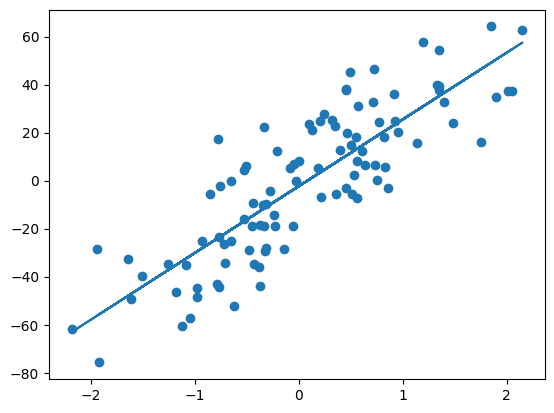

In [227]:
plt.scatter(X,y)
lr_general.fit(X,y)
plt.plot(X,lr_general.predict(X))